# Цифровая обработка сигналов - Лекция 6
# Фильтрация сигналов, БИХ и КИХ фильтры

## Введение

Перед вами обучающий материал по основам **цифровой обработки сигналов** с использованием средств языка программирования Python. Предполагается, что читатель имеет базовые знания из области высшей математики, а также владеет языком Python и хотя бы поверхностно знает различные python-библиотеки - numpy/scipy, matplotlib и другие. 

Для пользователей MATLAB / GNU Octave освоение материала с точки зрения программного кода не составит труда, поскольку основные функции и их атрибуты во многом идентичны и схожи с методами из python-библиотек.

### Сигналы и фильтры

В предыдущих разделах мы ввели понятие сигнала, спектра, Z-формы. В процессе прохождения сигнала от источника до получателя, последовательность данных претерпевает изменения и преобразования. Эти преобразования обусловлены прохождением сигнала через различные вычислительные устройства, реализующие ту или иную математическую задачу. В задачах цифровой обработки сигналов данные проходят через цифровые цепи, которые называются *фильтрами*. Цифровые фильтры, как и аналоговые, обладают различными характеристиками. Как правило, эти характеристики выражаются в частотном представлении - амплитудно-частотная и фазо-частотная характеристики фильтра. Цифровые фильтры используются в основном для улучшения качества сигнала - для выделения сигнала из последовательности данных, либо для ухудшения нежелательных сигналов - для подавления определенных сигналов в приходящих последовательностях отсчетов.

На сегодняшний день цифровые фильтры применяются практически везде, где требуется обработка сигналов. Даже примитивные математические операции (умножение и сложение) можно представить в виде цифрового фильтра. Следовательно, всё устройства, которые нас окружают (компьютеры, телефоны, телевизоры, и т.д.) содержат ряд тех или иных цифровых фильтров. Например, в телевизорах используются фильтры для преобразования выводимого изображения. Настройка яркости - по сути фильтрация изображения.  
Таким образом, цифровые фильтры применяются в широком спектре задач обработки сигналов: спектральный анализ, обработка аудио- и видео-данных, обработка речи, движения и т.д. Применительно к задачам ЦОС, фильтр - это некоторая математическая система, которая изменяет форму входного сигнала (амплитуду, фазу, частоту).

**Преимущества цифровых фильтров**:

- Возможность получения характеристик, которые невозможно получить аналоговыми методами (например, точную линейную ФЧХ).
- Цифровые фильтры стабильнее к внешним изменениями среды (температура, влажность, давление). Следовательно, цифровые фильтры не требуют постоянной калибровки.
- Простота перестройки частоты обработки сигнала.
- В зависимости от скорости обработки и частоты сигнала, один фильтр может одновременно обрабатывать данные с нескольких каналов.
- Данные до и после фильтра можно сохранить на любой носитель. Аналоговые сигналы записать сложнее (в любом случае требуется перевод в цифровую форму и обратно).
- Низкая потребляемая мощность и низкая стоимость относительно аналоговых фильтров.
- Повышенная точность вычисления (современные цифровые устройства не ограничены в точности вычисления).
- Простота проектирования фильтров со сложными частотными характеристиками.
- В задачах биомедицины применение аналоговых фильтров на очень низких частотах затруднительно, в отличие от цифровых фильтров.

**Недостатки цифровых фильтров**

- **Ограниченная разрядность**. В процессе вычисления в цифровых фильтрах с конечной разрядностью накапливаются шумы квантования, шумы округления. Одна из типовых задач ЦОС - выбор подходящей разрядность фильтра.
- **Ограничение скорости обработки**. Как правило, аналоговые фильтры способны обрабатывать данные на очень больших частотах. Цифровые фильтры ограничены частотой дискретизации.
- **Аппаратное обеспечение**. Поскольку реальные сигналы в природе - непрерывные, для их обработки используются АЦП и ЦАП. От характеристик этих устройств также зависит качество получаемых цифровых (аналоговых) сигналов.

Сигналы и фильтры в зависимости способа представления характеризуются разными функциями:

| **Сигнал**  | **Фильтр** | 
| --- | --- | 
| отсчеты $ x(n) $                           | импульсная характеристика $ h(n) $          | 
| z-форма $ X(z) $                           | передаточная функция $ H(z) $               | 
| спектральная плотность $ X(e^{j\phi}) $    |  частотная характеристика $ H(e^{j\phi}) $  | 
| модуль спектра $ \| X(e^{j\phi}) \| $      | АЧХ $ \| H(e^{j\phi}) \| $                  | 
| аргумент спектра $arg(X(e^{j\phi}))$       | ФЧХ $ arg(H(e^{j\phi})) $                   | 


**Импульсной характеристикой** $h(n)$ называется реакция цепи на входное воздействие в виде функции Дирака (δ-функции). Она отражает влияние цепи на сигнал. В цифровых устройствах импульсная характеристика может быть конечной или бесконечной. Следовательно, существует два класса цифровых фильтров - с конечной импульсной характеристикой и с бесконечной импульсной характеристикой.

Цифровые фильтры описываются разностным уравнением:

$$ y(k) = \frac{1}{a_0}\cdot(\sum_{k=0}^{N}b_{k}x(n-k) - \sum_{k=0}^{M}a_{k}y(n-k)) \tag{6.1}$$  

В этой формуле $ y(k) $ - выходное воздействие или отсчеты на выходе цифрового фильтра. $x(k)$ - входной сигнал. $a_{k}$ и $b_{k}$ - множители (коэффициенты) цифровых звеньев на входе и выходе. Эти множители также называются коэффициентами числителя и знаменателя передаточной характеристики фильтра. 

Передаточная характеристика фильтра имеет следующий вид:  

$$ H(z) = \frac{B(z)}{A(z)} = \frac{b_0 + b_{1}z^{-1} + ... + b_{N}z^{-N}}{1 + a_{1}z^{-1} + ... + a_{M}z^{-M}} \tag{6.2}$$  

где $N$ и $M$ - количество линий задержки для входного и выходного сигналов. В общем виде это формула БИХ-фильтра. Если знаменатель равен единице, то формула соответствует выражению для КИХ-фильтра (цифровой фильтр без обратной связи).

По реализации цифрового фильтра различают два метода: аппаратный и программный. Аппаратные фильтры реализуются на ПЛИС или специализированных сигнальных процессорах. Программные фильтры реализуются с помощью программ, выполняемых процессором или микроконтроллером.

Фильтры могут быть рекурсивными, когда выходной отсчет зависит от предыдущих выходных и от входного, т.е. в схеме присутствует обратная связь, или нерекурсивными, когда выходной отсчет зависит только от входных отсчетов.

### БИХ и КИХ фильтры

**КИХ фильтр** (англ. FIR — «finite impulse response») - это цифровой фильтр с конечной импульсной характеристикой. Импульсная характеристика такого фильтра ограничена во времени, то есть имеет счётное число коэффициентов. Начиная с определенного момента времени она становится равной нулю. Если на вход КИХ-фильтра подать единичный импульс, на выходе фильтра будет конечное число отсчетов. Как правило, ФЧХ фильтра с конечной импульсной характеристикой - линейна

В общем случае, КИХ-фильтры реализуются без обратных связей, то есть они нерекурсивные. Однако, с помощью математических преобразований можно привести фильтр к рекурсивной форме.

Разностное уравнение КИХ-фильтра:

$$ y(n) = \sum_{k=0}^{N-1}h(k)x(n-k) \tag{6.3}$$

где  

- $ y(n) $ - выходной дискретный сигнал (сумма взвешенных входных импульсов),
- $ x(n) $ - входной дискретный сигнал (последовательность отсчётов),
- $ h(n) $ - коэффициенты импульсной характеристики фильтра,
- $ N $ - длина (порядок) фильтра.

Передаточная характеристика КИХ-фильтра:

$$ H(z) = \sum_{k=0}^{N-1}h(k)z^{-k} \tag{6.4}$$

Напомним, что операция $z^{-k}$ - задержка последовательности на k-отсчетов.

**БИХ фильтр** (англ. IIR — «infinite impulse response») - это цифровой фильтр с бесконечной во времени импульсной характеристикой, то есть имеет очень большое или бесконечное число коэффициентов. БИХ фильтры также называют рекурсивными в связи с тем, что при их реализации используются обратные связи (сигнал с выхода фильтра через элементы задержки поступает на фильтр и вносит изменения сам в себя). Передаточная функция БИХ-фильтра имеет дробно-рациональный вид. Основные известные БИХ-фильтры: фильтр Чебышева, Баттерворта, Калмана, Бесселя и т.д.

Разностное уравнение БИХ-фильтра:

$$ y(n) = \sum_{k=0}^{N}b_{k}x(n-k) - \sum_{k=1}^{M}a_{k}y(n-k) \tag{6.5}$$

или

$$ y(n) = b_{0}x(n) + b_{1}x(n-1) + b_{M}x(n-M) + ... - a_{1}y(n-1) - a_{2}y(n-2) - ... - a_{N}y(n-N) \tag{6.6}$$

Как видно, выходной сигнал за счет обратных связей влияет сам на себя.

Передаточная характеристика БИХ-фильтра:

$$ H(z) = \frac{B(z)}{A(z)} = \frac{b_0 + b_{1}z^{-1} + ... + b_{N}z^{-N}}{1 + a_{1}z^{-1} + ... + a_{M}z^{-M}} \tag{6.7}$$  

В отличие от КИХ фильтров, БИХ фильтры не всегда являются устойчивыми. Для устойчивости цифрового БИХ фильтра требуется, чтобы все полюса передаточной характеристики по модулю были строго меньше единицы (то есть лежали внутри единичной окружности на z-плоскости).

**Порядок фильтра** – максимальная степень в выражении передаточной функции $H(z)$.

Передаточная функция может быть реализована при помощи различных структурных схем. Наиболее распространены последовательные и параллельные структурные схемы. Если передаточную дробно-рациональную функцию рекурсивного фильтра представить в виде произведения передаточных функций первого и второго порядка, то структурная схема будет *последовательной*. Если передаточную функцию рекурсивного фильтра представить в виде суммы передаточных функций первого и второго порядка, то структурная схема будет *параллельной*.

## Каноническая и прямая схема

Структурную схему цифрового фильтра можно представить в прямой и канонической форме. Цифровые фильтры могут быть реализованы с использованием трех цифровых элементов: умножитель, сумматор и блок задержки. Очевидно, что умножители требуются для умножения отсчётов на коэффициенты $a_{k}$ и $a_{k}$, а сумматор объединяет полученные результаты. 

Структурная схема нерекурсивного КИХ-фильтра, согласно уравнению:

<img src="https://raw.githubusercontent.com/capitanov/dsp-theory/master/img/fir_scheme.svg?sanitize=true" alt="FIR Common scheme" style="width: 70%;"/>

Количество линий задержки всегда на единицу меньше, чем число коэффициентов или порядок фильтра. Импульсная характеристика КИХ фильтра совпадает с набором коэффициентов этого фильтра.

Структурная схема БИХ-фильтра выглядит несколько сложнее из-за наличия обратных связей:

<img src="https://raw.githubusercontent.com/capitanov/dsp-theory/master/img/iir_scheme.svg?sanitize=true" alt="IIR Common scheme" style="width: 70%;"/>

Количество линий задержки БИХ фильтра равно $N+M$.

Структурная схема в **каноническом виде** минимизирует количество линий задержки, поскольку использует общие линии задержки. Входной сумматор - с обратными связями. Выходной сумматор - обобщает результат. Преобразование от одной формы к другой достаточно просто и тривиально

<img src="https://raw.githubusercontent.com/capitanov/dsp-theory/master/img/iir_scheme2.svg?sanitize=true" alt="IIR scheme 2" style="width: 70%;"/>


### Выбор фильтра

Перед разработчиками цифровых устройств часто встает задача выбора типа фильтра. Выбор между КИХ и БИХ фильтрами производится по следующим критериям:

- Фазовая характеристика БИХ фильтра - нелинейна. КИХ фильтры могут иметь строго линейную фазовую характеристику. Это означает, что такой фильтр не вносит искажений в форму сигнала. 
- КИХ фильтры - устойчивы, т.к. реализуются по нерекурсивной форме. БИХ фильтры могут быть неустойчивыми.
- В реальных задачах стоит вопрос о выборе разрядности данных (округление, квантование). Эти процессы вносят меньший вклад в устройства без обратных связей, то есть в КИХ фильтры.
- Реализация АЧХ сложной формы или максимально прямоугольной формы потребует значительного числа коэффициентов КИХ фильтра. БИХ фильтры с этой задачей справляются лучше.
- У КИХ фильтров, как правило, нет эквивалентных аналоговых фильтров.
- КИХ фильтры позволяют легко получать требуемые характеристики (уровень затухания, неравномерности в полосе пропускания, частота среза и т.д.)
- БИХ фильтры существенно экономнее по количеству операций умножения, сложения и количеству линий задержки.

### Пример

Пусть есть фильтр, который описывается следующей передаточной функцией:

$$ H(z) = \frac{b_0 + b_{1}z^{-1} + b_{2}z^{-2}}{1 + a_{1}z^{-1} + a_{2}z^{-2}} \tag{6.8}$$ 

где  

- $N = 2, M = 2$
- $b_{i} = \{0.1, -0.6, 0.5\}$
- $a_{i} = \{1, 0.7, -0.2\}$

Количество разностных уравнений для конкретного фильтра равно числу сумматоров в схеме. Зная разностное уравнение можно найти импульсную характеристику фильтра: на вход подается единичный импульс (начальные условия нулевые)

Найдем импульсную характеристику средствами Python. С помощью функции `lfilter(b, a, x)` моделируется процесс прохождения сигнала `x` через цифровой фильтр, с коэффициентами передаточной характеристики `a` и `b`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz, butter, firls, remez, firwin, firwin2, group_delay
from scipy.fftpack import fft, fftshift

FONT_SMALL = 12
FONT_MEDIUM = 14

plt.rc('axes', titlesize=FONT_MEDIUM) 
plt.rc('axes', labelsize=FONT_SMALL)
plt.rc('xtick', labelsize=FONT_SMALL)
plt.rc('ytick', labelsize=FONT_SMALL) 
plt.rc('legend', fontsize=FONT_MEDIUM) 
plt.rc('figure', titlesize=FONT_MEDIUM)

%matplotlib inline

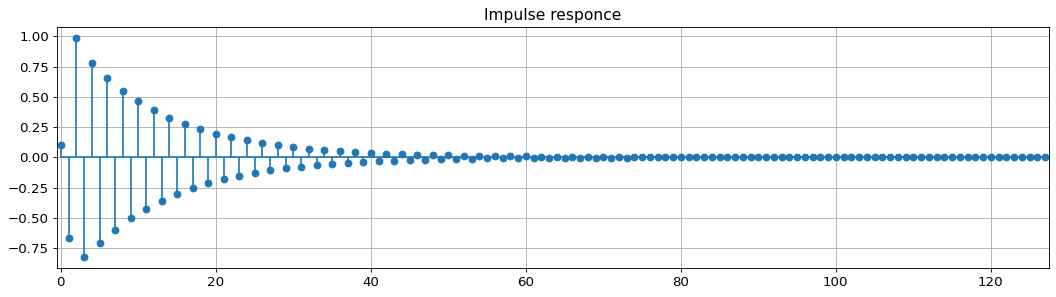

In [2]:
N = 128
# Delta-function
x = np.zeros(N)
x[0] = 1

# Input signal:
# h(z) = [b0 + b1*z^(-1) + b2*z^(-2)] / a0 + a1*z^(-1) + a2*z^(-2)
b = [0.1, -0.6, 0.5]
a = [1, 0.7, -0.2]

y1 = lfilter(b, a, x)

plt.figure(figsize=(16, 4), dpi=80)
plt.title('Impulse responce')
plt.stem(y1, use_line_collection=True, basefmt='C0')
plt.xlim([-0.5, N-0.5])
plt.grid(True)

**Если фильтр устойчив, то отсчеты y(n) уменьшаются по величине со временем**. 

Как видно на предыдущем графике - рассчитанный БИХ-фильтр - устойчив.

### БИХ-фильтры (SCIPY / MATLAB)


Ниже представлен список основных функций БИХ-фильтров для реализации в python с помощью пакета сигналов - `scipy.signal`. Большинство функций имеют аналогичные MATLAB-прототипы.

| **Function**      | **Description** | 
| --- | --- | 
| `iirdesign(wp, ws, gpass, gstop[, analog, ...])`      | Функция для полного расчёта цифрового фильтра. Возвращает коэффициенты `a, b`, нули и полюсы и т.д. | 
| `iirfilter(N, Wn[, rp, rs, btype, analog, ...])`      | Реализация БИХ-фильтра выбранного типа и N-порядка. Возвращает коэффициенты `a, b`, нули и полюсы и т.д. | 
| `butter(N, Wn[, btype, analog, output, fs])`          | Фильтр Баттерворта. Реализует фильтр N-порядка и возвращает коэффициенты фильтра. | 
| `buttord(wp, ws, gpass, gstop[, analog, fs])`         | Возвращает минимальный порядок, требуемый для реализации фильтра | 
| `cheby1(N, rp, Wn[, btype, analog, output, fs])`      | Фильтр Чебышева 1 типа. Реализует фильтр N-порядка и возвращает коэффициенты фильтра. | 
| `cheb1ord(wp, ws, gpass, gstop[, analog, fs])`        | Возвращает минимальный порядок, требуемый для реализации фильтра | 
| `cheby2(N, rs, Wn[, btype, analog, output, fs])`      | Фильтр Чебышева 2 типа. Реализует фильтр N-порядка и возвращает коэффициенты фильтра. | 
| `cheb2ord(wp, ws, gpass, gstop[, analog, fs])`        | Возвращает минимальный порядок, требуемый для реализации фильтра | 
| `ellip(N, rp, rs, Wn[, btype, analog, output, fs])`   | Эллиптический БИХ-фильтр (Кауэра) | 
| `ellipord(wp, ws, gpass, gstop[, analog, fs])`        | Возвращает минимальный порядок, требуемый для реализации фильтра от значений входных аргументов | 
| `bessel(N, Wn[, btype, analog, output, norm, fs])`    | БИХ-фильтр Бесселя. | 
| `iirnotch(w0, Q[, fs])`                               | **Заграждающий** фильтр. Возвращает коэффициенты `a, b`. Входные аргументы - частота сигнала, добротность и частота среза | 
| `iirpeak(w0, Q[, fs])`                                | **Полосовой** фильтр. Функция возвращает коэффициенты `a, b` фильтра второго порядка. Входные аргументы - частота сигнала, добротность и частота среза | 

____

### Фильтр Баттерворта

Пример реализации **фильтра Баттерворта** 3 порядка. Покажем, как зашумленный сигнал проходит через такой фильтр:

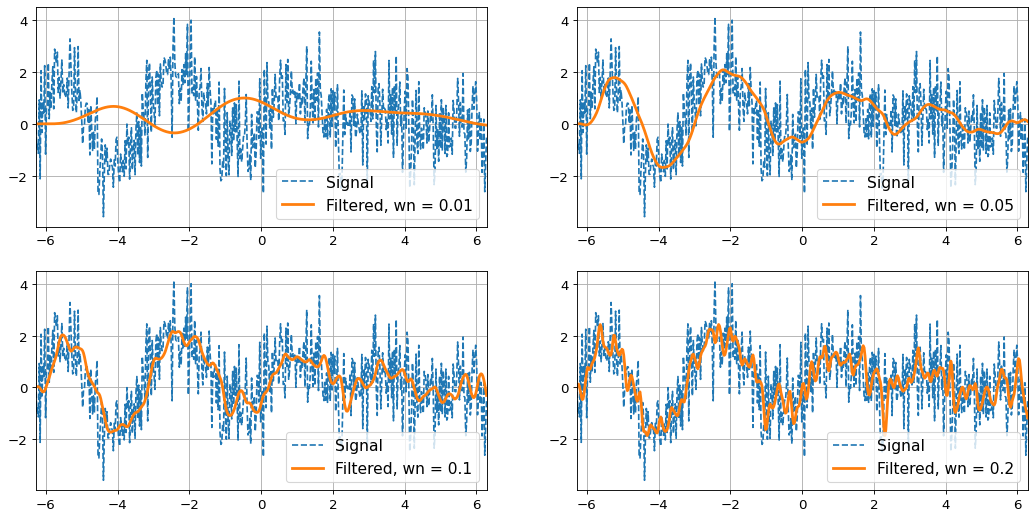

In [3]:
# Create input signal
t = 2 * np.pi * np.linspace(-1, 1, 500)
x = np.sin(0.25*t*t)+ 0.95*np.sin(2.0*t)

# Add some white noise
np.random.seed(1)
xn = x + np.random.randn(len(t))

# 3-order lowpass butterworth filter
b, a = butter(3, 0.2)
z = lfilter(b, a, xn)

wn = [0.01, 0.05, 0.1, 0.2]

# Calculate IIR filter
zz = np.zeros((t.size, 4))
for i in range(4):
    b, a = butter(3, wn[i])
    zz[:, i] = lfilter(b, a, xn)

# Plot results
plt.figure(figsize=(16, 8), dpi=80)
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(t, xn, 'C0--', linewidth=1.5)
    plt.plot(t, zz[:,i], 'C1', linewidth=2.5)
    plt.xlim([-2 * np.pi, 2 * np.pi])
    plt.grid(True)
    plt.legend(('Signal', 'Filtered, wn = {}'.format(wn[i])), loc='lower right')

### Рекурсивные КИХ фильтры

Как было сказано ранее, КИХ фильтры в основном строятся по нерекурсивной форме, однако есть способы приведения фильтров к рекурсивному виду. 

Рассмотрим следующий пример. Запишем передаточную характеристику фильтра: 

$$ H(z) = 1 + z^{-1} + z^{-2} + z^{-3} \tag{6.9}$$

Домножим передаточную функцию на 

$$ \frac{1 - z^{-1}}{(1 - z^{-1}} \tag{6.10}$$

Пропустим математические выкладки (при желании, это можно сделать самостоятельно ввиду тривиальности рассматриваемой задачи) и запишем результат:

$$ H(z) = \frac{1 + z^-3}{1 - z^-1} \tag{6.11}$$

Структурная схема такого фильтра представлена на следующем рисунке. Она состоит из двух цепей: звено без обратной связи - дифференцирующее, а звено с обратной связью - интегрирующее (сумматор с обратной связью).

<img src="https://raw.githubusercontent.com/capitanov/dsp-theory/master/img/fir_recursive.svg?sanitize=true" alt="FIR Recursive" style="width: 70%;"/>

Покажем, что сигнал, прошедший через рекурсивный КИХ-фильтр, имеет аналогичные характеристики.

In [4]:
N = 40
# Delta-function
x = np.zeros(N)
x[0] = 1

# Filter order - M
M = 16
# Input signal
# h(z) = 1 + z^(-1) + ... + z^(-9)
b = np.ones(M-1)
a = [1]

y1 = lfilter(b, a, x)

# Change to recursive form
b = np.zeros(M)
b[0] = 1
b[M-1] = -1

a = [1, -1]
y2 = lfilter(b, a, x)

# Check the difference
np.all(y1 == y2)

True

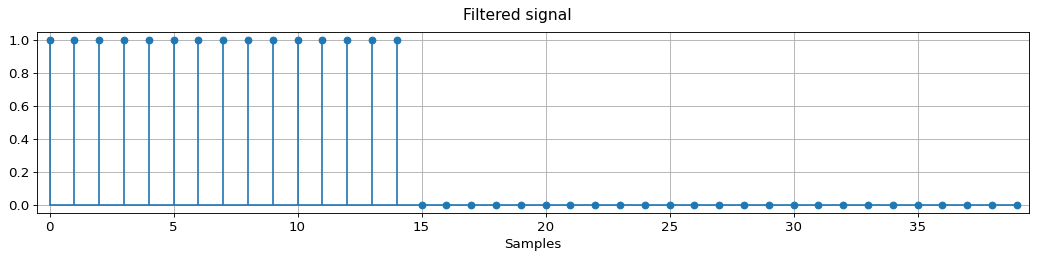

In [5]:
plt.figure(figsize=(16, 3), dpi=80)
plt.stem(y2, use_line_collection=True, basefmt='C0')
plt.xlim([-0.5, N-0.5])
plt.xlabel('Samples')
plt.suptitle('Filtered signal')
plt.grid(True)

Как видно из графика, импульсная характеристика рекурсивного фильтра равна вектору единиц. Причем, длина вектора равна длине фильтра.

### Однородные КИХ фильтры

Такие КИХ фильтры называются **однородными**. Для реализации этих фильтров не требуется операция умножения, следовательно фильтр работает достаточно быстро и довольно хорошо реализуется на ПЛИС.

Недостатком таких фильтров является большой уровень боковых лепестков. Боковые лепестки АЧХ подавляются путем каскадирования фильтров, при этом положение нулей не меняется, а меняется только соотношение уровней главного и бокового лепестков, относительный уровень боковых лепестков уменьшается при перемножении АЧХ.

Второй недостаток однородных фильтров – **непрямоугольная** форма АЧХ. Чтобы сделать ее более прямоугольной, используют корректирующий КИХ-фильтр, таким образом форма главного лепестка становится более прямоугольной, но увеличивается уровень боковых лепестков.

В разделе, связанном с **децимацией и интерполяцией** сигналов мы подробнее рассмотрим эти фильтры. 

С помощью функции `freqz` можно найти частотную характеристику фильтра.

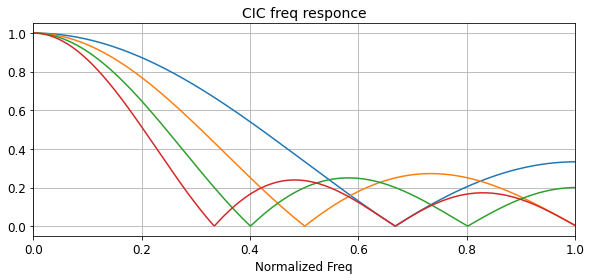

In [6]:
N = 512
f = np.linspace(0, 1, N, endpoint=True)
b = [1, 1, 1]

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
for i in range(4):
    _, h = freqz(b, N)
    h = np.abs(h)
    plt.plot(f, h/np.max(h))
    plt.xlim([0, 1])
    plt.grid(True)
    b.append(1)
plt.xlabel('Normalized Freq')
plt.title('CIC freq responce')
plt.tight_layout()

### КИХ фильтры с линейной ФЧХ

Самая важная особенность КИХ фильтров заключается в возможности получения точной **линейной фазовой характеристики**. 

Почему это важно? Сигнал при прохождении через фильтр подвергается различным преобразованиям. В частности, изменяются амплитуда и фаза сигнала в зависимости от частотной характеристики фильтра (амплитудной, АЧХ и фазовой, ФЧХ). Для многочастотных сигналов недопустимо, чтобы при прохождении цифровых узлов обработки, фаза сигнала искажалась. Причем, если АЧХ в полосе пропускания сделать практически постоянной не составляет труда, то с ФЧХ возникают проблемы. 

Для оценки искажений фазы удобно ввести понятия фазовой и групповой задержек. 

**Фазовая задержка** — это величина задержки для каждой из частотных компонент сигнала. Определяется как угол сдвига фазы, деленный на частоту.  

$$ \tau_{\phi} = - \theta(\omega)/\omega \tag{6.12}$$

**Групповая задержка** — это средняя временная задержка всего многочастотного сигнала. Определяется как производная фазы по частоте. 

$$ \tau_{g} = - d\theta(\omega)/\omega \tag{6.13}$$

Из формулы для групповой задержки очевидно условие **линейности ФЧХ** фильтра. Правило:

**Если ФЧХ — линейна, то групповая задержка после взятия производной равна константе**

Иными словами групповая задержка постоянна для **всех** частотных компонент. Таким образом, линейность фазовой характеристики — одна из важнейших особенностей КИХ-фильтров. 

### Симметрия импульсной характеристики

Для обеспечения линейности ФЧХ необходимо выполнение условия **симметрии импульсной характеристики** (или коэффициентов) фильтра. Проще говоря, КИХ фильтр с линейной ФЧХ — симметричен. Существует 4 типа фильтров, отличающихся четностью порядка фильтра N и типом симметрии:

- положительная симметрия, четный порядок,
- отрицательная симметрия, четный порядок,
- положительная симметрия, нечетный порядок,
- отрицательная симметрия, нечетный порядок.

Например, для фильтров с отрицательной симметрией можно получить сдвиг фазы на $\frac{\pi}{2}$. Такие фильтры используются для проектирования дифференциаторов и **преобразования Гильберта**. 

Огибающая импульсной характеристики КИХ фильтра строится по закону **~sin(x)/x** независимо от типа фильтра (низких частот, верхних частот, дифференциатор, полосовой или режекторный фильтр). Для решения практических задач не приходится задумываться о том, какого типа фильтр выбран.

### Проектирование КИХ фильтров

Под «расчетом FIR фильтра» в большинстве случаев понимают поиск его **коэффициентов** по значениям частотной характеристики. 

При создании нового цифрового КИХ фильтра инженер проходит через определенные стадии разработки:

- **Спецификация фильтра**. Задается тип фильтра (ФНЧ, ФВЧ, полосовой, режекторный), количество коэффициентов **N**, требуемая частотная характеристика, с допусками на нелинейность в полосе затухания и полосе пропускания и т. д.
- **Вычисление коэффициентов**. Любыми доступными способами и средствами вычисляются коэффициенты фильтра, удовлетворяющие спецификации из предыдущего пункта.
- **Анализ следствий конечной разрядности**. На этом этапе оценивается влияние эффектов квантования на коэффициенты фильтра, промежуточные и выходные данные.

- **Реализация**. На этой стадии происходит разработка фильтра аппаратными или программными средствами: на доступном языке программирования или на базе ПЛИС или специальных сигнальных процессоррах.

Этапы разработки могут быть несколько иными, но суть проектирования цифрового КИХ фильтра всегда остается та же.

### Спецификация фильтра

На этой стадии инженер производит поиск компромиссных решений для реализации требуемого КИХ фильтра с нужными параметрами. Их немного, но часто приходится жертвовать одним параметром для достижения требуемых значений по другим величинам.

- $A_{pass}$ — неравномерность в полосе пропускания,
- $A_{stop}$ — уровень затухания в полосе подавления,
- $F_{pass}$ — граничная частота полосы пропускания,
- $F_{stop}$ — граничная частота полосы затухания,
- $N$ — порядок фильтра (количество коэффициентов фильтра). 

На практике, параметры $A_{pass}$ и $A_{stop}$ задают в децибелах (дБ), а расстояние между $F_{pass}$ и  $F_{stop}$ выражает ширину полосы перехода фильтра. Логично, что значение $A_{pass}$ должно быть как можно меньше, $A_{stop}$ как можно больше, а отношение $F_{pass}/F_{stop}$ в идеале стремится к единице (идеально прямоугольная АЧХ). 

Количество коэффициентов не зря вносится в спецификацию фильтра. Как будет показано далее, от порядка фильтра N и разрядности коэффициентов зависят параметры частотной характеристики фильтра.

### Вычисление коэффициентов фильтра

Существует множество методов расчета коэффициентов фильтра — метод взвешивания оконными функциями, метод частотной выборки, различные оптимальные (по Чебышеву) методы с применением алгоритма Ремеза и т.д. Все методы уникальны по своим особенностям и дают те или иные результаты. Для метода оконного взвешивания негативным проявлением становится **эффект Гиббса**, вносящий неравномерность и выбросы в частотную характеристику фильтра между рассчитанными точками функции. Бороться с ним можно бесконечно и безрезультатно, но на практике вводят допуски по неравномерностям в полосе пропускания и полосе подавления.

Основным методом расчета коэффициентов для многих фильтров является модифицированный **алгоритм Ремеза** — «Parks-McClellan algorithm». Это косвенный итерационный метод для нахождения оптимальных значений с Чебышевской характеристикой фильтра. Особенность метода заключается в минимизации ошибки в полосе затухания и полосе пропускания путем Чебышевской аппроксимации импульсной характеристики. 

Вполне логично, что чем больше количество коэффициентов, тем меньше неравномерность АЧХ и тем она прямоугольнее. От выбора метода зависит конечный результат, но все они сводятся к одним и тем же целям — минимизации выбросов в полосе пропускания и увеличении «прямоугольности» АЧХ (при сохранении условия линейности ФЧХ).

### Анализ следствий конечной разрядности

**Разрядность коэффициентов** — главный фактор, от которого зависит вид частотной характеристики. На примере современных программируемых логических интегральных схемах (ПЛИ) разрядность коэффициентов может быть выбрана любой, но реальные значения лежат пределах от 16 до 27 битов в связи с особенностью реализации вычислительных блоков (DSP48). 

Для высоких порядков фильтра часто требуется обеспечить большой динамический диапазон разрядной сетки, но если этого не удается сделать, рано или поздно начинают проявляться ошибки квантования. Из-за ограниченной разрядности коэффициентов модифицируется частотная характеристика, а в некоторых случаях она искажается настолько сильно, что приходится жертвовать параметрами из частотной спецификации для достижения приемлемого результата. Так или иначе, разрядность представления коэффициентов прямо влияет на максимально возможное затухание $A_{stop}$. Поэтому при использовании слишком ограниченной разрядной сетки коэффициентов, порой невозможно достичь желаемого подавления даже при огромных порядках фильтра!

### Реализация

С помощью современных библиотек на разных языках программирования (С++, Python, MATLAB, и т.д.) программная реализация КИХ фильтров не составляет труда. Однако, аппаратная реализация на микроконтроллерах или ПЛИС - сложная и нетривиальная задача.

Для реализации простейших КИХ фильтров требуются операции задержки, умножения на коэффициенты и сложение результатов произведения. Основной узел, с помощью которого реализуется КИХ фильтр на ПЛИС — целочисленный DSP блок. В этом блоке происходят все математические операции — перемножение входных отсчетов с коэффициентами фильтров, задержка входного сигнала, суммирование данных. Современные узлы DSP содержат предварительный сумматор, поэтому даже операции суммирования для фильтров с симметричной ИХ можно делать внутри этого узла. Помимо DSP блока, фильтру нужна память для хранения коэффициентов и реализации звена задержки. Как правило, этих ресурсов у ПЛИС более чем достаточно. 
____

## Расчет КИХ фильтров на Python

**Программная реализация КИХ фильтра - поиск коэффициентов импульсной характеристики**.

Расчёт КИХ фильтров производится с помощью некоторых функций из пакета `scipy.signal`. Перечислим все методы проектирования КИХ фильтров и подробно расмотрим каждый из них.

| **Function**      | **Description** | 
| --- | --- | 
| `firls(numtaps, bands, desired[, weight, nyq, fs])`   | Расчет КИХ-фильтра с помощью метода наименьших квадратов | 
| `firwin(numtaps, cutoff[, width, window, ...])`       | Реализация КИХ-фильтра N-порядка с применением оконной функции. Задается частота среза. | 
| `firwin2(numtaps, freq, gain[, nfreqs, ...])`         | Расчет фильтра с применением оконной функции. Задается набор нормированных частот и амплитуд на этих частотах | 
| `remez(numtaps, bands, desired[, weight, Hz, ...])` | Расчет оптимального фильтра с помощью алгоритма Ремеза |
| `group_delay(system[, w, whole, fs])`                 | Вспомогательная функция для расчета групповой задержки. Входные параметры - массив коэффициентов `a, b` | 
| `get_window(window, Nx, fftbins=True)[source]` | Возвращает коэффициенты оконной функции требуемой длины |


#### Расчет КИХ-фильтра с помощью метода наименьших квадратов

С помощью метода наименьших квадратов эта функция рассчитывает коэффициенты фильтра, который имеет наилучшее приближение к требуемой частотной характеристике. Математически в процессе поиска коэффициентов интеграл от взвешенной среднеквадратичной ошибки в пределах полосы пропускания сводится к минимуму.

Метод `firls` возвращает коэффициенты КИХ фильтра. Входные аргументы функции:

 - `numtaps` - порядок фильтра,
 - `bands` - монотонная неубывающая последовательность частот. Все элементы должны быть неотрицательными и меньше или равными частоте Найквиста, заданной параметром `nyq`.
 - `desired` - последовательность амплитуд, содержащая требуемое усиление и ослабление на заданных значениях частот из `bands`.
 - `weight` - относительный "вес" полос пропускания и подавления. Задает компромисс качества в этих полосах.
 - `nyq` или `fs` - частота Найквиста. Если значение не задано, по умолчанию равно единице. 


#### Расчет КИХ-фильтра с помощью алгоритма Ремеза:

Метод `remez` возвращает коэффициенты КИХ фильтра. Входные аргументы идентичны предыдущему методу:

 - `numtaps` - порядок фильтра,
 - `bands` - монотонная неубывающая последовательность частот. Все элементы должны быть неотрицательными и меньше или равными частоте Найквиста, заданной параметром `nyq`.
 - `desired` - последовательность амплитуд, содержащая требуемое усиление и ослабление на заданных значениях частот из `bands`.
 - `weight` - относительный "вес" полос пропускания и подавления. Задает компромисс качества в этих полосах.
 - `Hz` или `fs` - частота Найквиста. Если значение не задано, по умолчанию равно единице. 

#### Расчет КИХ-фильтра оконным методом:

Методы `firwin` и `firwin2`  возвращают коэффициенты КИХ фильтра. 

**Метод firwin**

 - `numtaps` - порядок фильтра,
 - `cutoff` - частота среза относительно частоты дискретизации `fs`.
 - `width` - если задано значение, то показывает ширину перехода от полосы пропускания до полосы подавления. 
 - `window` - оконная функция. Применяется в совокупности с методом `get_window` или напрямую задается название окна.
 - `fs` - частота дискретизации или частота Найквиста. Если значение не задано, по умолчанию равно единице. 

**Метод firwin2**

 - `numtaps` - порядок фильтра,
 - `freq` - монотонная неубывающая последовательность частот. Все элементы должны быть неотрицательными и меньше или равными частоте Найквиста, заданной параметром `fs`.
 - `gain` - последовательность амплитуд, содержащая требуемое усиление и ослабление на заданных значениях частот из `freq`.
 - `window` - оконная функция. Применяется в совокупности с методом `get_window` или напрямую задается название окна.
 - `fs` - частота дискретизации или частота Найквиста. Если значение не задано, по умолчанию равно единице. 

#### Оконная функция

Оконным функциям и их особенностям посвящен отдельный раздел, однако перечислим наиболее используемые оконные функции в практических задачах: Кайзера, Гаусса, Блэкмана-Харриса, окно с плоской вершиной, Хэмминга, Ханна и т.д..

Для выбора оконной функции применяется метод `get_window`. Входные аргументы - название окна и длина импульсной характеристики. 

Функция возвращает одномерный массив коэффициентов - значений импульсной характеристики. Эти коэффициенты путем операции свёртки "накладываются" на импульсную характеристику КИХ фильтра.

#### Групповая задержка

Это вспомогательная функция для расчета групповой задержки цифровых фильтров. Входные параметры - массив коэффициентов `a, b`. Метод возвращает набор частот и соответствующий массив групповых задержек по этим частотам.
____

### Примеры

Первый пример - использование функции `firwin2`. Зададим массив нормированных частот от 0 до 1. Зададим усиление на выбранных частотах, а также порядок фильтра. Построим импульсную характеристику.

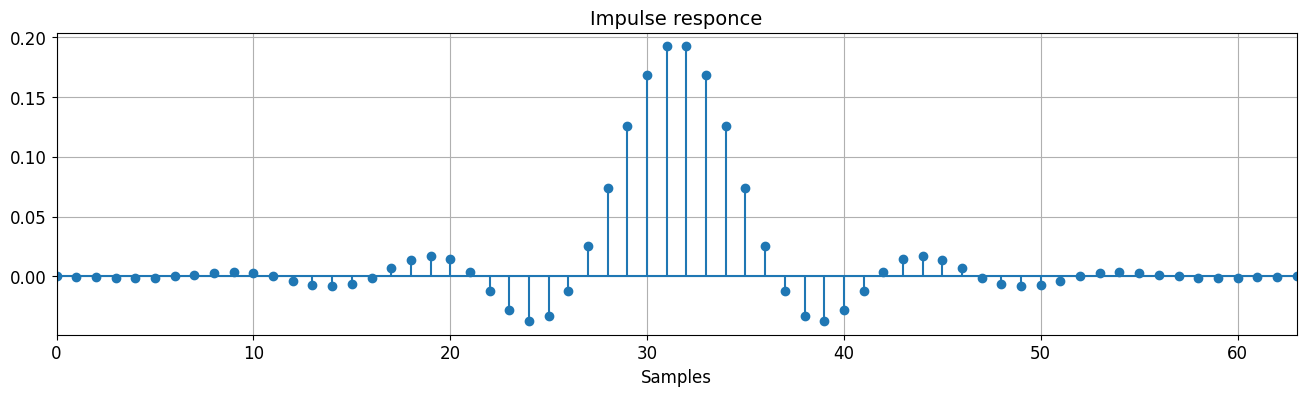

In [7]:
N = 100
# List of freqs
lst_freqs = np.linspace(0, 1, N)

# List of gains
lst_gain = np.zeros(N)
lst_gain[0:20] = 1

# FIR filter taps
NFIR = 64
taps = firwin2(NFIR, lst_freqs, lst_gain)

plt.figure(figsize=(16, 4), dpi=100)
plt.title('Impulse responce')
plt.stem(taps, use_line_collection=True, basefmt='C0')
plt.xlim([0, NFIR-1])
plt.xlabel('Samples')
plt.grid(True)

Построим АЧХ полосового фильтра и фильтра нижних частот с помощью трех методов: `firls(), remez(), firwin2()`.

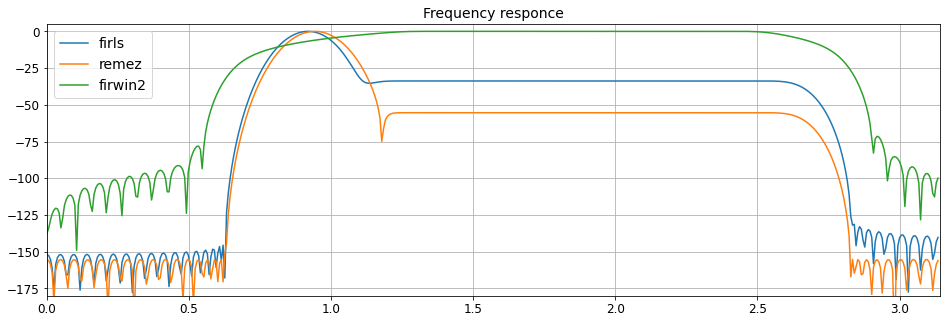

In [8]:
# Input parameters
fs = 10
N = 117
desired = (0, 0, 1, 1, 0, 0)
bands = (0, 1, 2, 4, 4.5, 5)

# FIR filters
fir_firls = firls(N, bands, desired, fs=fs)
fir_remez = remez(N, bands, desired[::2], fs=fs)
fir_firwin2 = firwin2(N, bands, desired, fs=fs)

# PLot results and calculate FFTs
plt.figure(figsize=(16, 5))
plt.title('Frequency responce')
for fir in (fir_firls, fir_remez, fir_firwin2):
    freq, resp = freqz(fir)
    resp = np.abs(resp)
    resp /= np.max(resp) + 10**(-15)
    plt.plot(freq, 20*np.log10(resp))
plt.xlim([0, np.pi])
plt.ylim([-180, 5])
plt.legend(['firls', 'remez', 'firwin2'], loc ='upper left')
plt.grid(True)

### КИХ фильтр Кайзера

Покажем прохождение зашумленного гармонического сигнала через КИХ фильтр. Также добавим к этому сигналу несколько высокочастотных гармонических сигналов разной амплитуды. 

Как видно, зашумленный сигнал во временной области не поддается никакому анализу. Пропустив такой сигнал через КИХ фильтр с заранее подобранной частотой среза, можно выделить интересуемый сигнал из помех.

Следует отметить, что все сигналы и шумы, попавшие в полосу пропускания фильтра - остаются и **вносят вклад** в качественные характеристики результирующего сигнала. 

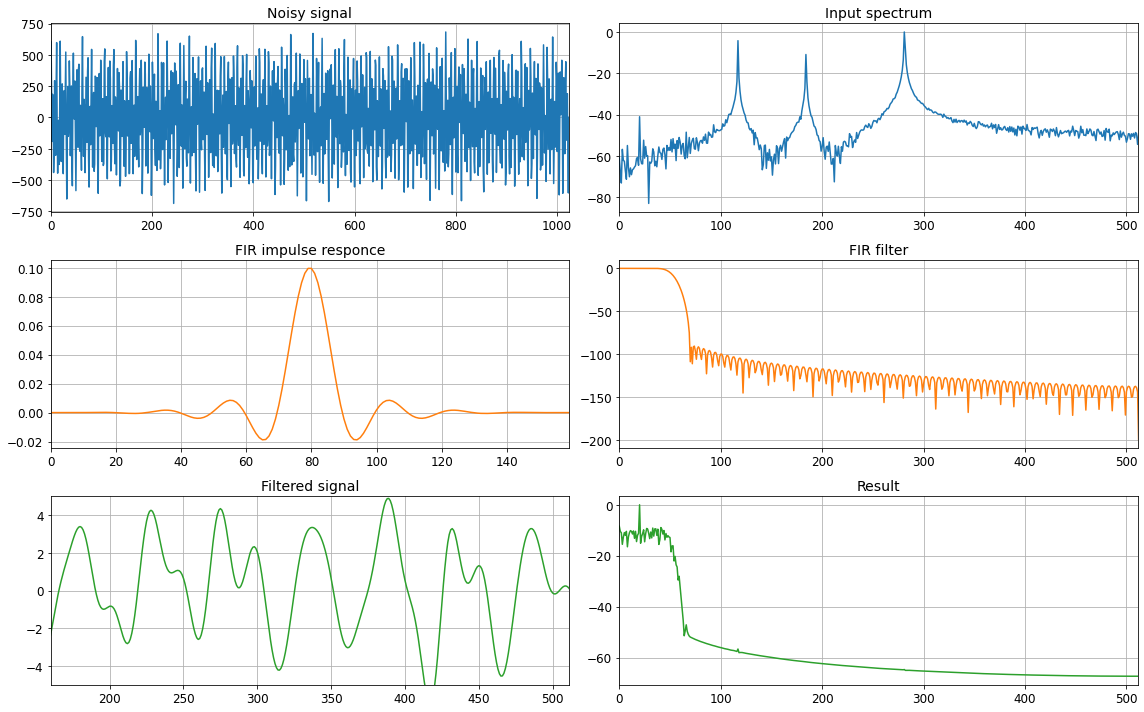

In [9]:
N = 1024
# Create input signal
t = np.linspace(0, 1, N, endpoint=True)
x = 3*np.cos(2*np.pi*20*t) + 210*np.sin(2*np.pi*117*t) + 100*np.sin(2*np.pi*184*t) + 380*np.sin(2*np.pi*281*t)

# Add some white noise
np.random.seed(1)
xn = x + 5*np.random.randn(N)

# Kaiser FIR filter
taps = 160
h = firwin(taps, 0.1, window=('kaiser', 9))
y = lfilter(h, 1, xn)

# List of input signals
lst_sig = [xn, h, y]

sig_titles = ['Noisy signal', 'FIR impulse responce', 'Filtered signal']
fft_titles = ['Input spectrum', 'FIR filter', 'Result']


plt.figure(figsize=(16, 10))
for i in range(3):
    # Calculate FFTs
    clc_fft = np.abs(fft(lst_sig[i], N)) 
    clc_fft = 20*np.log10(10e-11+clc_fft/np.max(clc_fft))
    
    # Plot signals
    plt.subplot(3, 2, 2*i+1)
    plt.plot(lst_sig[i], color='C'+str(i))
    plt.title(sig_titles[i])
    if (i == 2):
        plt.ylim([-5, 5])
        plt.xlim([taps, lst_sig[i].size//2-1])
    else:
        plt.xlim([0, lst_sig[i].size-1])
    plt.grid(True)
    
    plt.subplot(3, 2, 2*(i+1))
    plt.plot(clc_fft, color='C'+str(i))
    plt.title(fft_titles[i])
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

На представленном выше рисунке видно, что выходной отфильтрованный сигнал с небольшими искажениями похож на гармонический сигнал, который требовалось получить. К сожалению, добиться идеальной формы гармонического колебания с помощью фильтрации КИХ или БИХ фильтрами - невозможно, поскольку основная задача фильтра - отсечение ненужных спектральных компонент. Для улучшения качества фильтруемого сигнала применяются другие методы цифровой обработки сигналов (спектральные и корреляционные).

На этом заканчивается раздел,посвященный цифровой фильтрации. В следующих разделах будут подробно описаны оконные функции, задачи многоскоростной обработки сигналов - децимации и интерполяции, расчёт фильтра-корректора и т.д.